<a href="https://colab.research.google.com/github/imZiho/Deep-Learning_Seminar/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%97%90%20%EA%BC%AD%20%ED%95%84%EC%9A%94%ED%95%9C%20%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9D%98%20%EA%B0%9C%EB%85%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such 

In [3]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

In [4]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

In [5]:
#여기서부터 실습
x = np.array([5,7,9])
y = x
print(x)
print(y)

[5 7 9]
[5 7 9]


In [6]:
x[1]=-1
print(x)
print(y)

[ 5 -1  9]
[ 5 -1  9]


In [7]:
x = np.array([5,7,9])
y = x.copy()
x[1]=-1
print(x)
print(y)

[ 5 -1  9]
[5 7 9]


In [8]:
import torch
x1 = torch.ones(5)    # 1이라는 값을 가진 5개의 텐서를 만들어라
print(x1)

x2 = x1.data.numpy()  # 텐서로부터 같은 값을 가진 넘파이 변수가 생성된다
print(x2)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [9]:
x1[1]=-1     # 텐서의 특정 값을 변경하면 넘파이까지 연동되어 변경됨
print(x1)
print(x2)   # 이 경우도 COPY함수를 이용하여 대처가능

tensor([ 1., -1.,  1.,  1.,  1.])
[ 1. -1.  1.  1.  1.]


In [10]:
x1 = torch.ones(5)
x2 = x1.data.numpy().copy()   # 뒤에 copy함수만 추가해줌
x1[1]=-1
print(x1)
print(x2)                   # 이처럼 COPY해주면 넘파이까지 연동되어 변경되지않음

tensor([ 1., -1.,  1.,  1.,  1.])
[1. 1. 1. 1. 1.]


'합성함수'를 파이썬으로 구현하기

In [11]:
def f(x):                         # 파이썬에서 함수 정의하는 방법
    return(2*x**2+2)              # 2x**2+2함수를 정의 후 넘파이를 이용해서
x = np.arange(-2,2.1,0.25)       # -2부터 2까지 0.25의 간격의 배열로 변수x정의
print(x)
y = f(x)
print(y)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]
[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


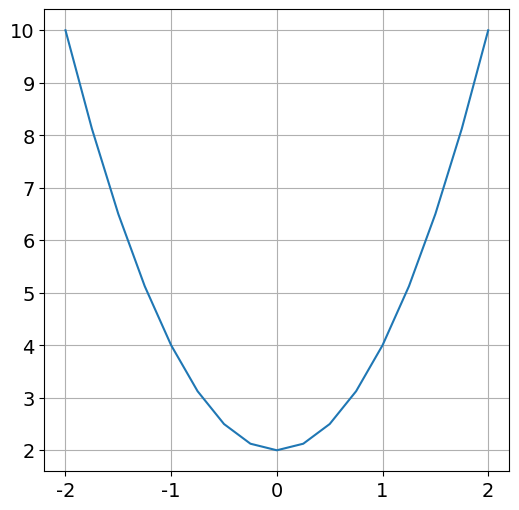

In [12]:
plt.plot(x,y)
plt.show()

여기서부터는 2차함수를 합성함수로 정의한 것

In [13]:
def f1(x):                  # 첫번쨰 함수는 엑스의 제곱
  return(x**2)
def f2(x):                  # 두번째 함수는 엑스에 2를 곱하고
  return(x*2)
def f3(x):                  # 세번째 함수는 엑스에 2를 더해주는 세가지 기본함수 정의 후
  return(x+2)


# 여기서  첫번쨰 함수의 결과값에 2를 곱하고 두번쨰 함수의 결과값에 2를 더함으로 합성함수를 정의해보면
x1 = f1(x)
x2 = f2(x1)
y = f3(x2)

미분과 파이썬의 수치미분 구현하기


[1.4500e+09 9.8516e+08 6.5000e+08 4.1641e+08 2.6000e+08 1.6016e+08
 1.0000e+08 6.6406e+07 5.0000e+07 4.5156e+07 5.0000e+07 6.6406e+07
 1.0000e+08 1.6016e+08 2.6000e+08 4.1641e+08 6.5000e+08]


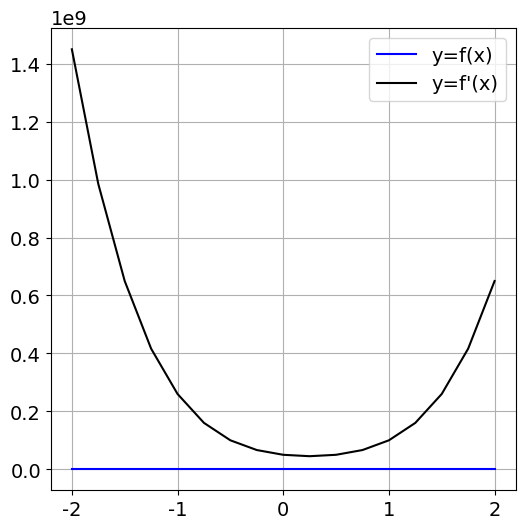

In [14]:
def  fdiff(f):
  def diff(x):
    h = 0.0000001                       #자연상수e는 2.7정도 되는 수 대부분 h = 0.001넣고 쓰는 경우도 많
    return f((x+h)-f(x-h))/(2*h)
  return diff

diff = fdiff(f)
y_dash = diff(x)
print(y_dash)

plt.plot(x,y,label=r'y=f(x)', c= 'b')
plt.plot(x,y_dash,label=r"y=f'(x)",c='k')
plt.legend()
plt.show()

[0.1192 0.148  0.1824 0.2227 0.2689 0.3208 0.3775 0.4378 0.5    0.5622
 0.6225 0.6792 0.7311 0.7773 0.8176 0.852  0.8808]


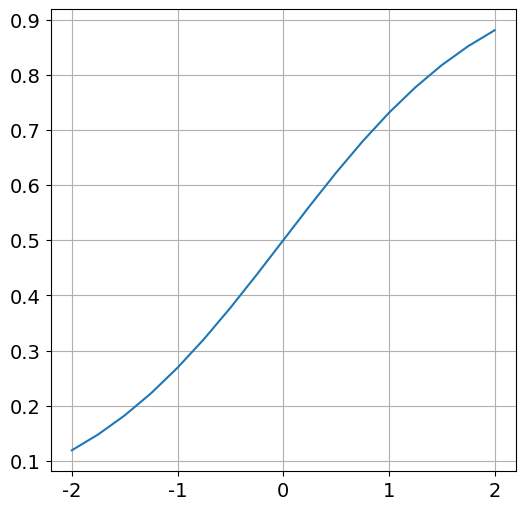

In [15]:
def g(x):
  return 1/(1+np.exp(-x))

y = g(x)
print(y)

plt.plot(x,y)
plt.show()

[ 536221.8591  651648.3273  783872.8591  932662.8542 1097192.6882
 1276234.75   1468438.4873 1672587.2461 1887703.4909 2112917.996
 2347116.9987 2588489.795  2834165.182  3080113.3568 3321399.2982
 3552740.2956 3769204.2862]


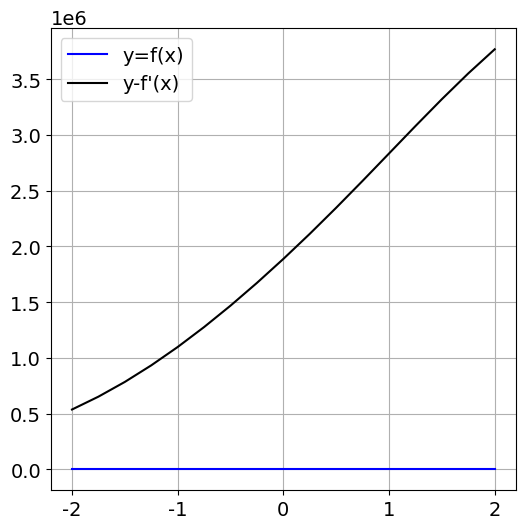

In [16]:
diff = fdiff(g)     # 교재랑 답이 다르게 나옴---그래프도 다르게 그려짐 다시 확인하기
y_dash = diff(x)
print(y_dash)

plt.plot(x,y,label=r'y=f(x)',c = 'b')
plt.plot(x,y_dash,label=r"y-f'(x)",c='k')
plt.legend()
plt.show()

2 3
-1 -2


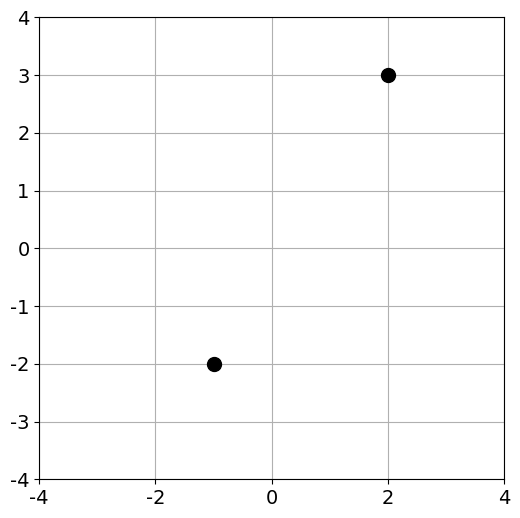

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class point:
  def __init__(self,x,y):
    self.x = x
    self.y = y
  def draw(self):
    plt.plot(self.x,self.y,marker = 'o',markersize = 10, c='k')

p1 = point(2,3)
p2 = point(-1,-2)
print(p1.x,p1.y)
print(p2.x,p2.y)

p1.draw()
p2.draw()
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

In [18]:
class Circle1(point):
  def __init__(self, x, y,r):
    super().__init__(x, y)
    self.r=r

c1_1=Circle1(1,0,2)
print(c1_1.x,c1_1.y,c1_1.r)

1 0 2


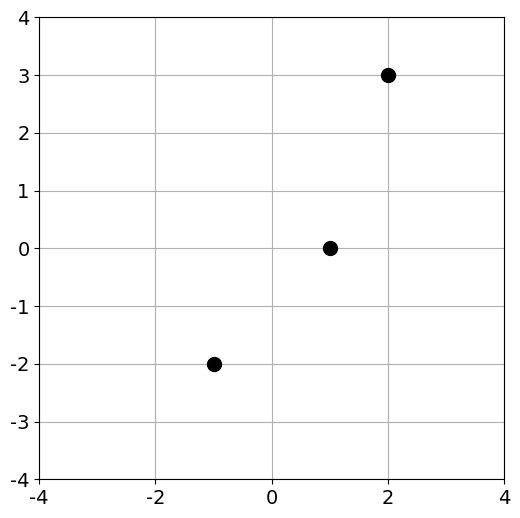

In [19]:
ax=plt.subplot()
p1.draw()
p2.draw()
c1_1.draw()
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

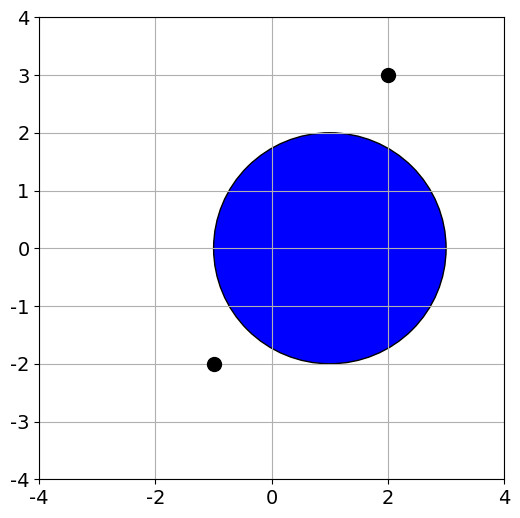

In [20]:
class Circle2(point):
  def __init__(self, x, y,r):
    super().__init__(x, y)
    self.r = r
  def draw(self):
    c = patches.Circle(xy=(self.x,self.y),radius=self.r,fc='b',ec='k')
    ax.add_patch(c)

c2_1=Circle2(1,0,2)
ax = plt.subplot()
p1.draw()
p2.draw()
c2_1.draw()
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

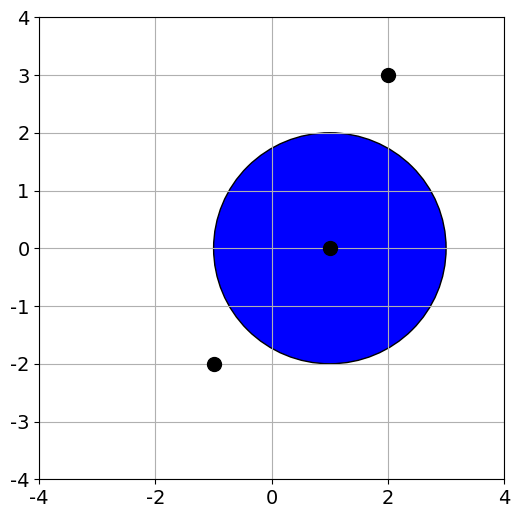

In [21]:
class Circle3(point):
  def __init__(self, x, y,r):
    super().__init__(x, y)
    self.r = r
  def draw(self):
    super().draw()
    c = patches.Circle(xy=(self.x,self.y),radius=self.r,fc='b',ec='k')
    ax.add_patch(c)

c3_1=Circle3(1,0,2,)
ax = plt.subplot()
p1.draw()
p2.draw()
c3_1.draw()
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

1.6 인스턴스를 함수로 사용하기


In [22]:
class H:
  def __call__(self,x):
    return(2*x**2+2)
x=np.arange(-2,2.1,0.25)
print(x)
h = H()
y=h(x)
print(y)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]
[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


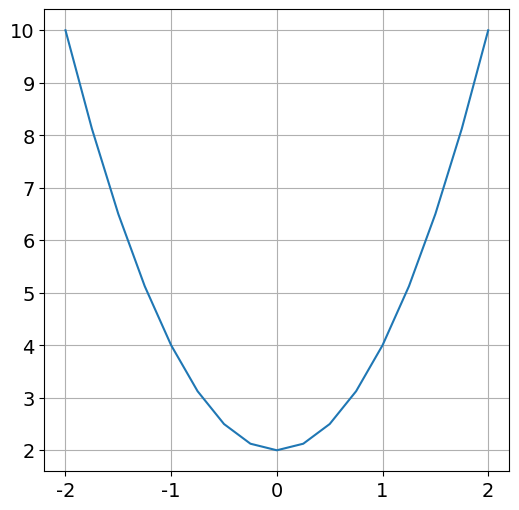

In [23]:
plt.plot(x,y)
plt.show()